# Getting the data

In [71]:
data <- read.csv2("../data/PlantGrowth.csv", sep = ',', dec='.')

In [72]:
head(data)

X,weight,group
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.50,ctrl
6,4.61,ctrl


In [73]:
data <- data[-c(1)] # drop the 'X' (index) column

In [74]:
summary(data)

     weight       group   
 Min.   :3.590   ctrl:10  
 1st Qu.:4.550   trt1:10  
 Median :5.155   trt2:10  
 Mean   :5.073            
 3rd Qu.:5.530            
 Max.   :6.310            

In [75]:
str(data)

'data.frame':	30 obs. of  2 variables:
 $ weight: num  4.17 5.58 5.18 6.11 4.5 4.61 5.17 4.53 5.33 5.14 ...
 $ group : Factor w/ 3 levels "ctrl","trt1",..: 1 1 1 1 1 1 1 1 1 1 ...


In [77]:
levels(data$group) # 'group' col is properly encoded

[1] "ctrl" "trt1" "trt2"

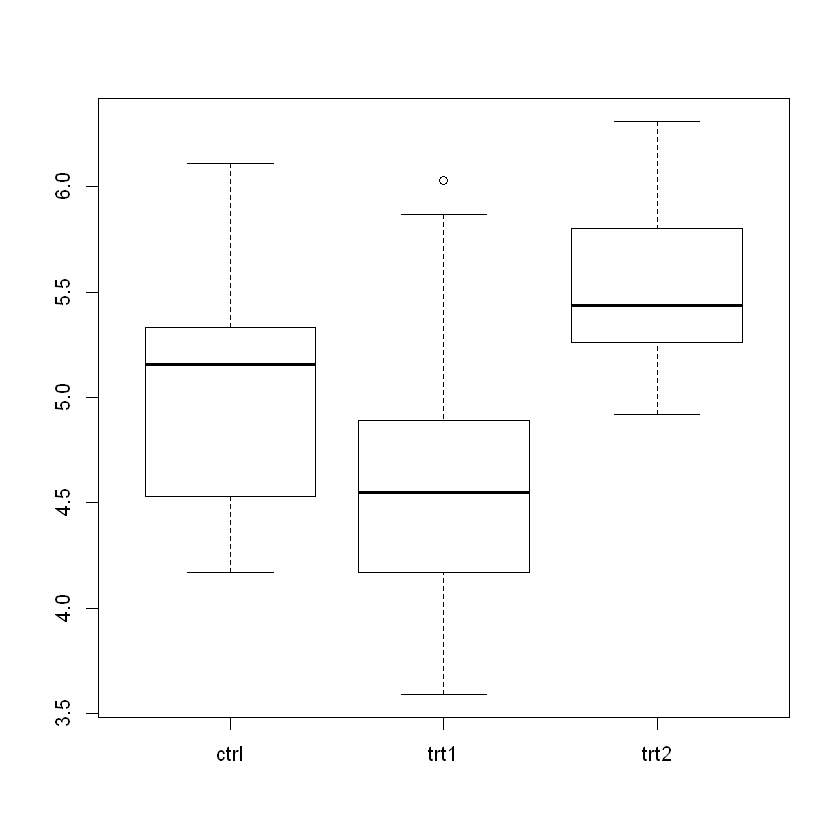

In [82]:
boxplot(weight~group, data) # a little visualization

# Fitting the model

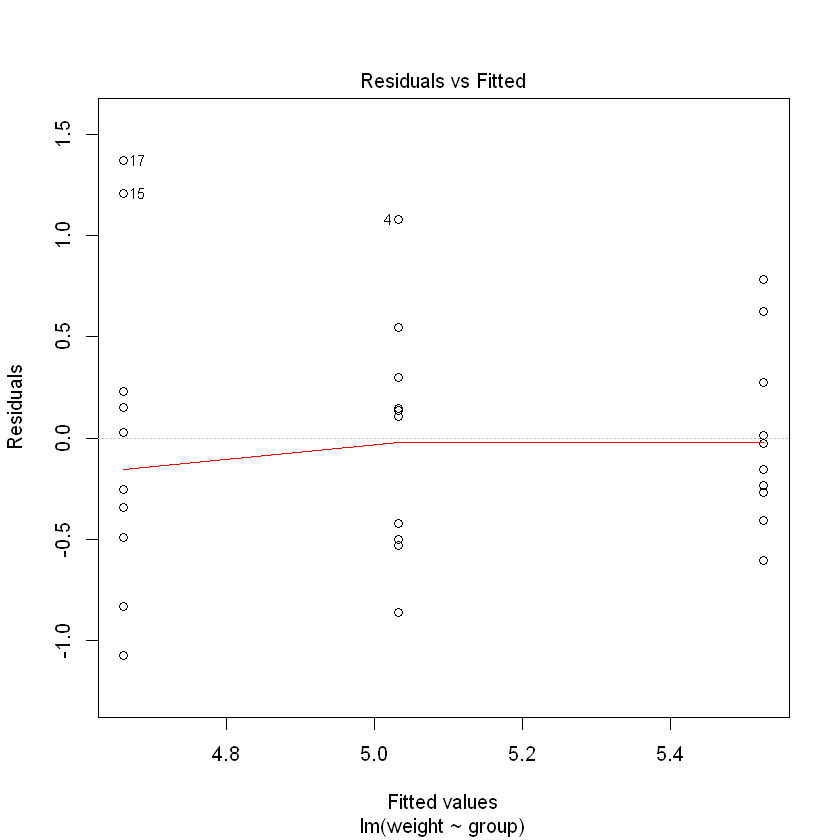

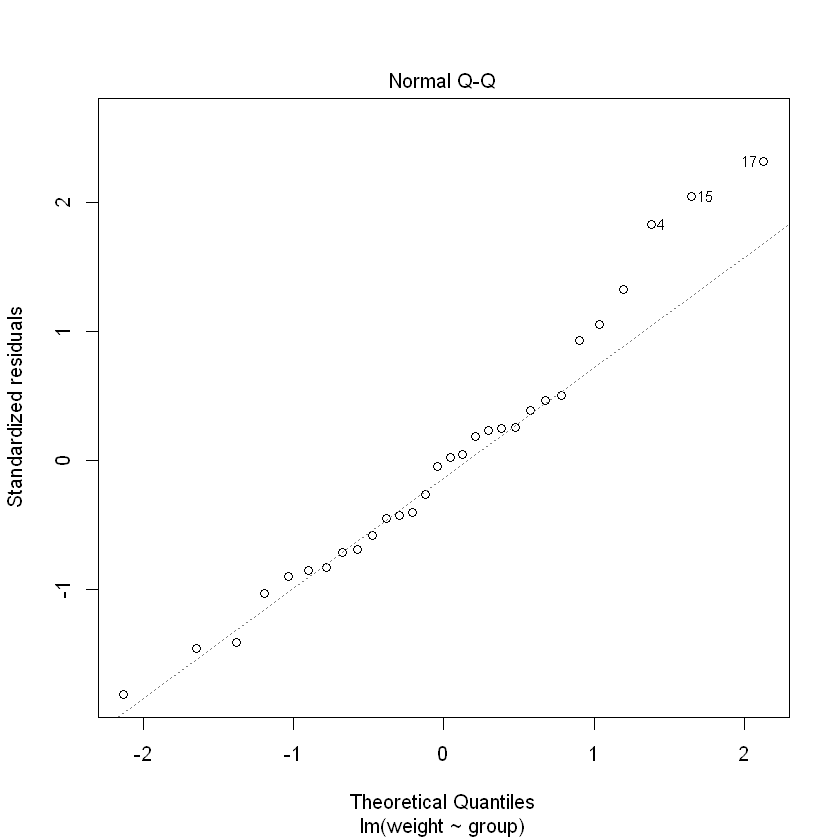

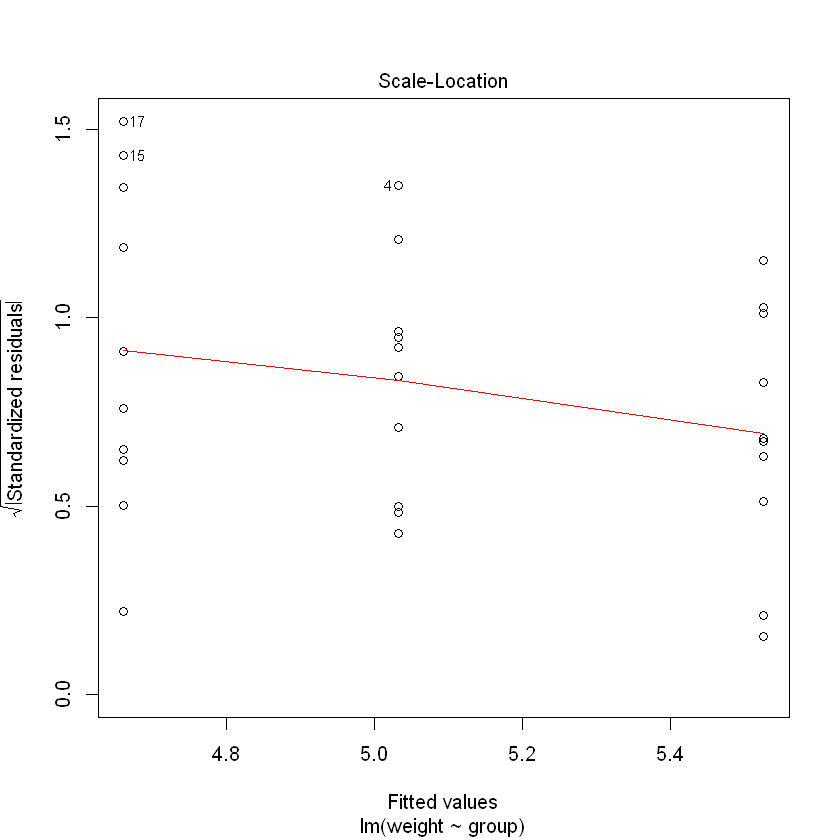

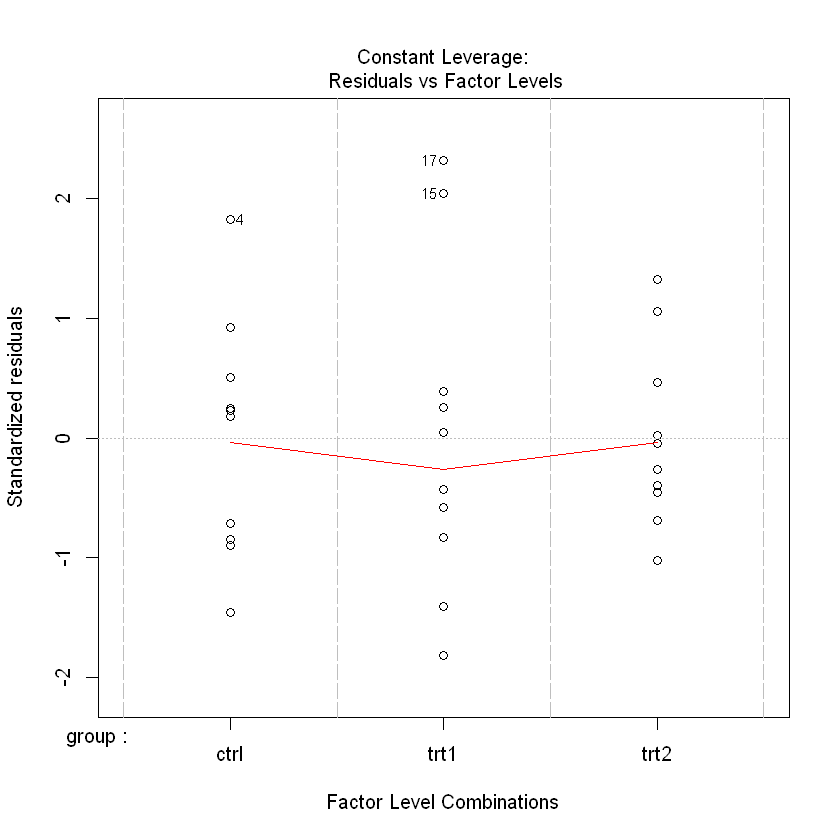

In [113]:
fit = lm(weight~group, data) # setup ANOVA model
plot(fit)

In [114]:
aov = anova(fit) 
aov # whou, works great!

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
group,2,3.76634,1.8831700,4.846088,0.01590996
Residuals,27,10.49209,0.3885959,NA,NA


# Post-hoc analysis

## no adjustment

In [142]:
pairwise.t.test(data$weight, data$group, p.adj = "none") # using pooled SD (different from individual t tests)


	Pairwise comparisons using t tests with pooled SD 

data:  data$weight and data$group 

     ctrl   trt1  
trt1 0.1944 -     
trt2 0.0877 0.0045

P value adjustment method: none 

In [146]:
pairwise.t.test(data$weight, data$group, p.adj='none', pool.sd = FALSE)


	Pairwise comparisons using t tests with non-pooled SD 

data:  data$weight and data$group 

     ctrl   trt1  
trt1 0.2504 -     
trt2 0.0479 0.0093

P value adjustment method: none 

## Tukey

In [112]:
library("lsmeans") # needed for ANOVA analysis and post-hoc tests

Loading required package: emmeans

Attaching package: 'emmeans'

The following object is masked from 'package:multcomp':

    cld

The 'lsmeans' package is now basically a front end for 'emmeans'.
Users are encouraged to switch the rest of the way.
See help('transition') for more information, including how to
convert old 'lsmeans' objects and scripts to work with 'emmeans'.


In [121]:
lsmeans(fit, pairwise ~ group) # results of Tukey's test with P values

$lsmeans
 group lsmean        SE df lower.CL upper.CL
 ctrl   5.032 0.1971284 27 4.627526 5.436474
 trt1   4.661 0.1971284 27 4.256526 5.065474
 trt2   5.526 0.1971284 27 5.121526 5.930474

Confidence level used: 0.95 

$contrasts
 contrast    estimate        SE df t.ratio p.value
 ctrl - trt1    0.371 0.2787816 27   1.331  0.3909
 ctrl - trt2   -0.494 0.2787816 27  -1.772  0.1980
 trt1 - trt2   -0.865 0.2787816 27  -3.103  0.0120

P value adjustment: tukey method for comparing a family of 3 estimates 


In [131]:
TukeyHSD(aov)

ERROR: Error in UseMethod("TukeyHSD"): no applicable method for 'TukeyHSD' applied to an object of class "c('anova', 'data.frame')"


## Bonferroni adjustment

In [124]:
pairwise.t.test(data$weight, data$group, p.adj = "bonferroni")


	Pairwise comparisons using t tests with pooled SD 

data:  data$weight and data$group 

     ctrl  trt1 
trt1 0.583 -    
trt2 0.263 0.013

P value adjustment method: bonferroni 

## Holm

In [128]:
pairwise.t.test(data$weight, data$group, p.adj = "holm")


	Pairwise comparisons using t tests with pooled SD 

data:  data$weight and data$group 

     ctrl  trt1 
trt1 0.194 -    
trt2 0.175 0.013

P value adjustment method: holm 

## Dunnett

In [153]:
summary(glht(fit, linfct=mcp(group="Dunnett")))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Dunnett Contrasts


Fit: lm(formula = weight ~ group, data = data)

Linear Hypotheses:
                 Estimate Std. Error t value Pr(>|t|)
trt1 - ctrl == 0  -0.3710     0.2788  -1.331    0.323
trt2 - ctrl == 0   0.4940     0.2788   1.772    0.153
(Adjusted p values reported -- single-step method)
